In [2]:
import psutil
import os
import numpy as np
from multiprocessing import Manager, Process, Lock
from cuda_code.final.monolithic import *

In [12]:
M = [5, 10, 15, 20, 25, 30, 35, 40]
bounds = [[-1000, 1000], [-1000, 1000]]
num_particles = 50
max_iter = 1000
m = 5

GSO(4, bounds, num_particles, max_iter, rastrigin)

(array([0.99686813, 0.99372918]), 9.837637265867376e-06)

In [93]:
def monitor(target, bounds, num_particles, max_iter, costfunc, M):
    worker_process = Process(target=target, args=(M, bounds, num_particles, max_iter, costfunc, None))
    worker_process.start()
    p = psutil.Process(worker_process.pid)

    # log cpu usage of `worker_process` every 10 ms
    cpu_percents = [0.0]
    start = time.time()
    time_at = []
    top_prcnt = []
    while worker_process.is_alive():
        top = psutil.cpu_percent(percpu=True)
        top_prcnt.append(top)
        cpu_percents.append(p.cpu_percent())
        time_at.append(time.time()-start)
        time.sleep(0.01)
    worker_process.join()
    return cpu_percents, time_at, top_prcnt

In [114]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def multiple_cpu_plot(top_prcnt, time_at, zoom_range=[], step=1):
    cols = list()
    for i in range(psutil.cpu_count()):
        cols.append('cpu_'+str(i+1))
    df = pd.DataFrame.from_records(top_prcnt, columns=cols)
    df['time_at'] = time_at   
    fig, ax = plt.subplots(figsize=(20,20), ncols=3, nrows=3)

    sns.set_style("dark")
    flat_ax = [bx for axs in ax for bx in axs]
    for i,sdf in enumerate(flat_ax):
        if i >= psutil.cpu_count():
            break
        if zoom_range!= []:
            sdf.set_xticks((np.arange(zoom_range[0], zoom_range[1]+1, step)))
            sdf.set_xlim(zoom_range[0], zoom_range[1])
        sdf.set_title('cpu_'+str(i+1))
    for i in range(psutil.cpu_count()):
        sns.lineplot(x='time_at', y='cpu_'+str(i+1), data=df, ax=flat_ax[i])

# Rosen 2 cpu graph
bounds = [[-1000, 1000], [-1000, 1000]]

num_particles = 50

max_iter = 1000

m = 5

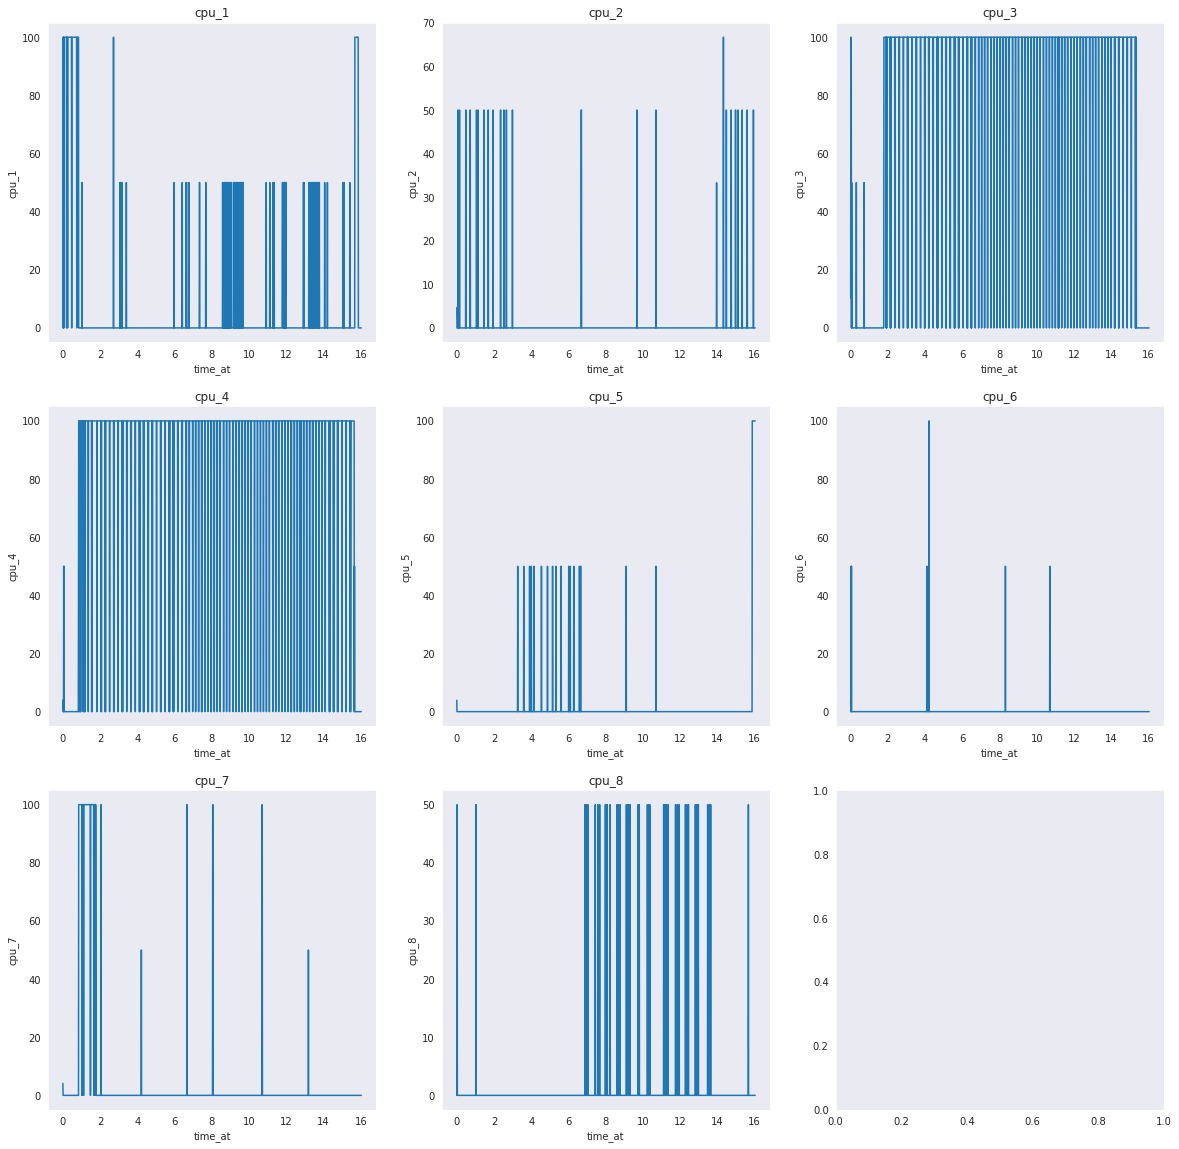

In [117]:
cpu_percents, time_at, top_prcnt = monitor(GSO, bounds, num_particles, max_iter, rosen, 2)
multiple_cpu_plot(top_prcnt, time_at)

# Rosen 4 CPU Graphs
bounds = [[-1000, 1000], [-1000, 1000]]

num_particles = 50

max_iter = 1000

m = 5

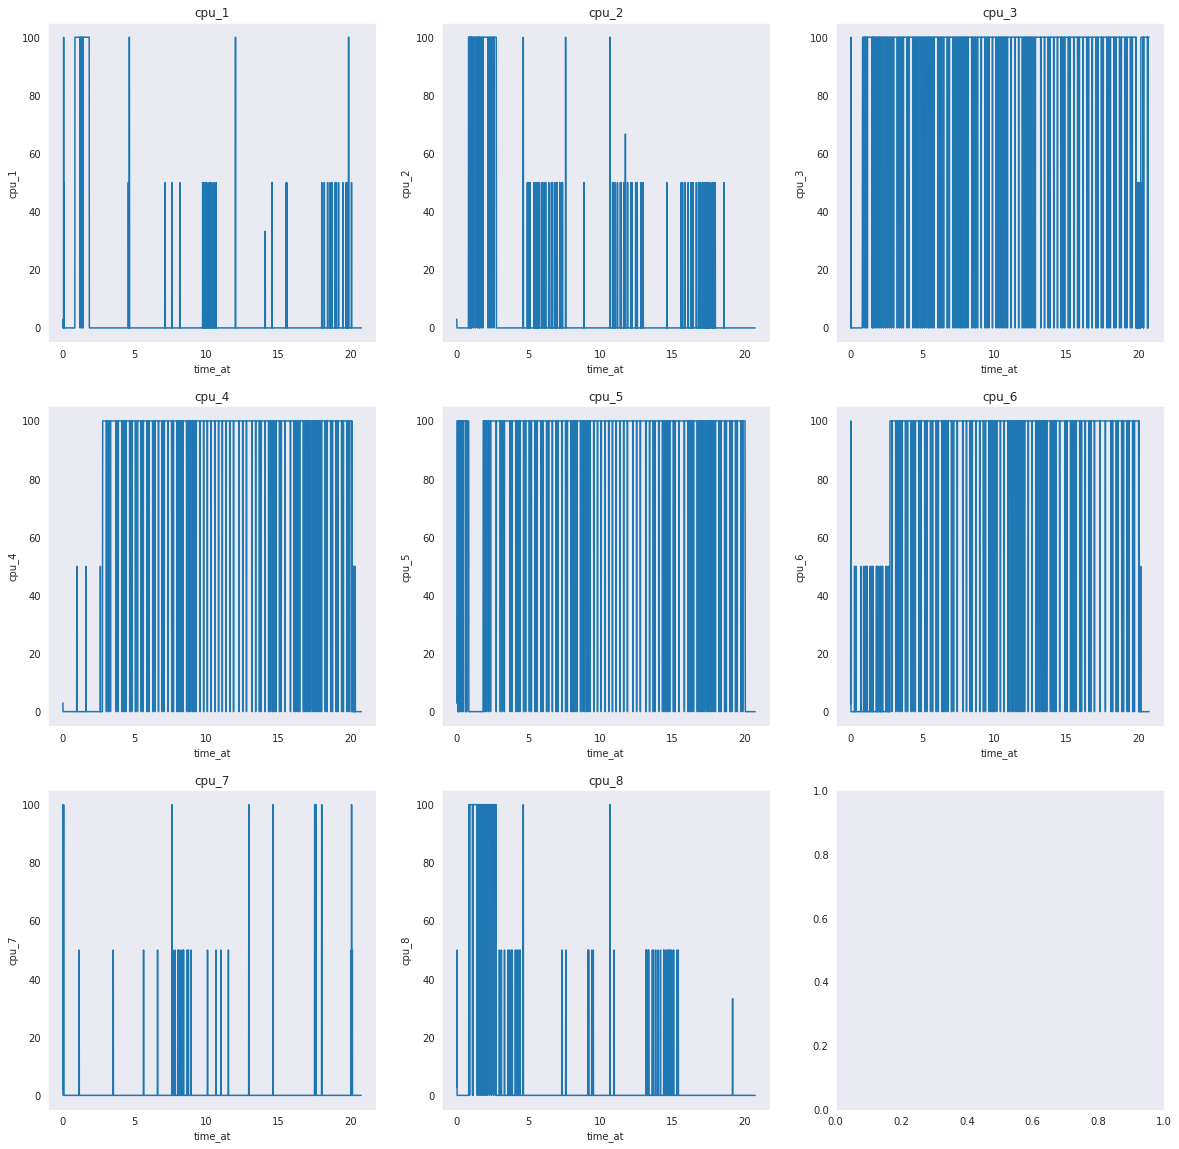

In [119]:
bounds = [[-1000, 1000], [-1000, 1000]]
num_particles = 75
max_iter = 1500

cpu_percents, time_at, top_prcnt = monitor(GSO, bounds, num_particles, max_iter, rosen, 4)
multiple_cpu_plot(top_prcnt, time_at)

# Rosen 8 CPU Graphs
bounds = [[-1000, 1000], [-1000, 1000]]

num_particles = 75

max_iter = 1500

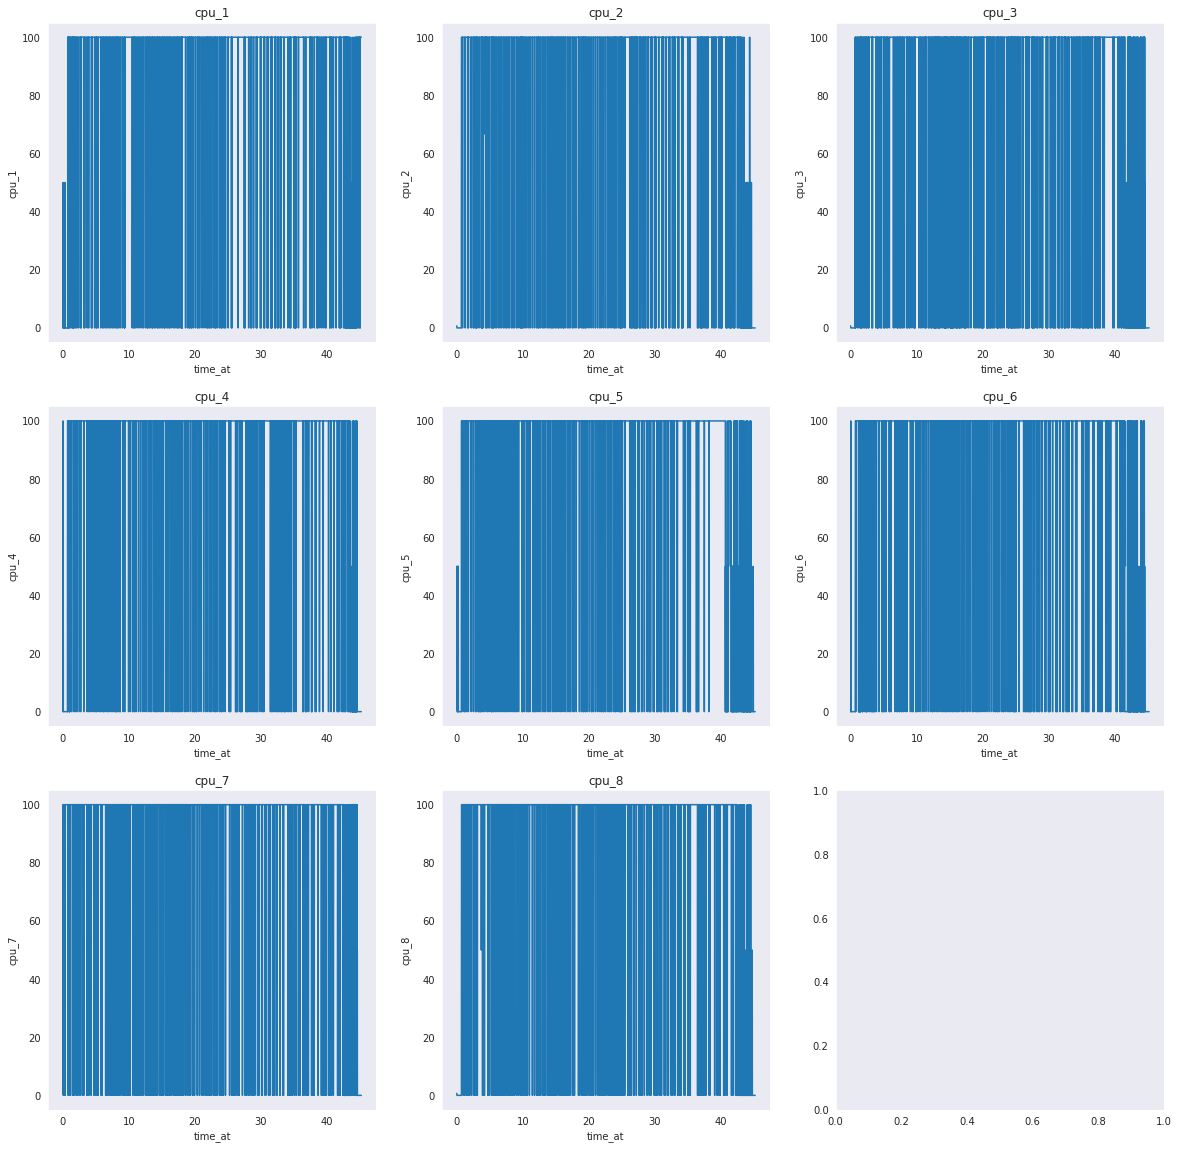

In [123]:
# Rosen 8 CPU Graphs
bounds = [[-1000, 1000], [-1000, 1000]]
num_particles = 75
max_iter = 1500

cpu_percents, time_at, top_prcnt = monitor(GSO, bounds, num_particles, max_iter, rosen, 8)
multiple_cpu_plot(top_prcnt, time_at)

In [15]:
def regular_plot(cpu_percents, time_at):
    df = pd.DataFrame.from_dict({'cpu_percent': cpu_percents, 'time_at': time_at})
    plt.figure(figsize=(16,9))
    sns.set_style("dark")
    sns.lineplot(x='time_at', y='cpu_percent', data=df)

def zoomed_plot(cpu_percents, time_at, zoom_range, step):
    df = pd.DataFrame.from_dict({'cpu_percent': cpu_percents, 'time_at': time_at})
    plt.figure(figsize=(16,9))
    sns.set_style("dark")
    plt.xticks((np.arange(zoom_range[0], zoom_range[1]+1, step)))
    plt.xlim(zoom_range[0], zoom_range[1])
    sns.lineplot(x='time_at', y='cpu_percent', data=df)

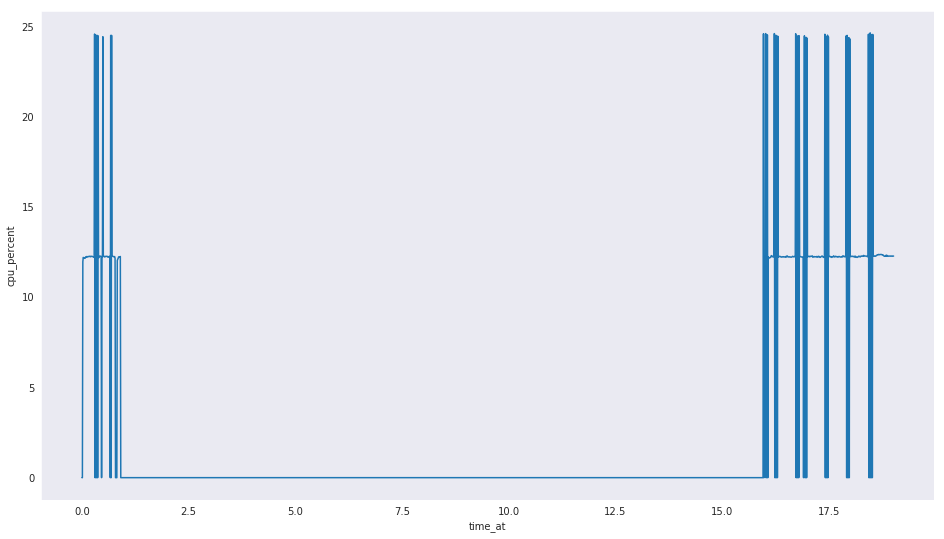

In [17]:
regular_plot(cpu_percents, time_at)

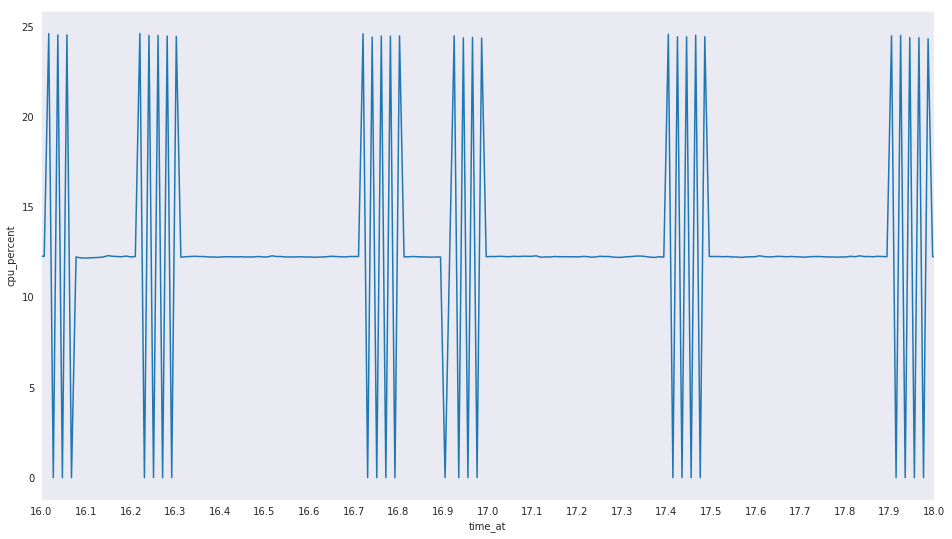

In [18]:
zoomed_plot(cpu_percents, time_at, [16, 18], 0.1)

In [56]:
M = [5, 10, 15, 20, 25, 30, 35, 40]
bounds = [[-1000, 1000], [-1000, 1000]]
num_particles = 50
max_iter = 1000

cpu_percents_rastrigin, time_at_rastrigin = monitor(GSO, bounds, num_particles, max_iter, rastrigin)

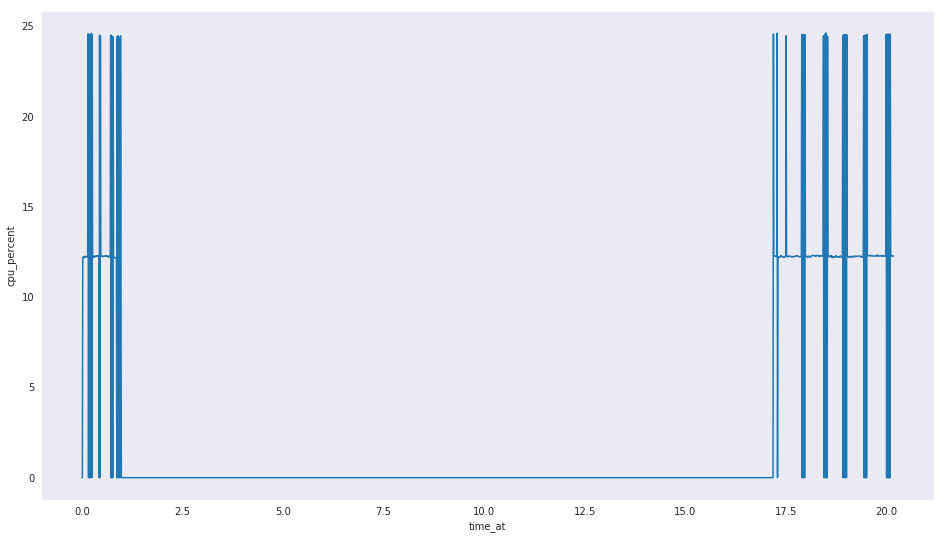

In [57]:
regular_plot(cpu_percents_rastrigin, time_at_rastrigin)

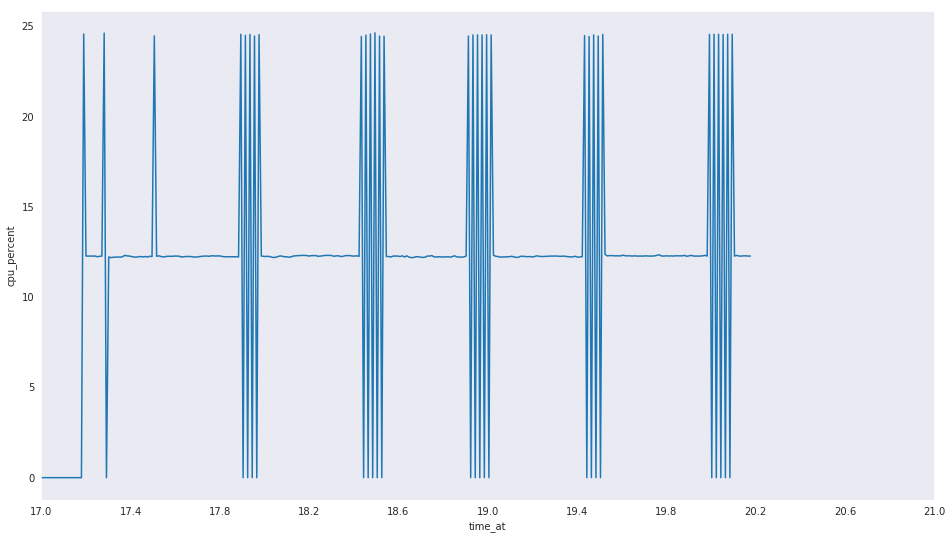

In [64]:
zoomed_plot(cpu_percents_rastrigin, time_at_rastrigin, [17, 21], 0.4)

In [65]:
max(cpu_percents_rastrigin)

24.6375

In [66]:
max(cpu_percents)

24.6625